In [1]:
using Revise
using PauliPropagation
using Plots

In [2]:
nq = 8
op = PauliString(nq, :Z, 4)

PauliString(nqubits: 8, 1.0 * IIIZIIII)

In [3]:
nl = 4
topo = bricklayertopology(nq; periodic=false)

circ = hardwareefficientcircuit(nq, nl; topology=topo)
nparams = countparameters(circ)
ngates = length(circ)

124

### Sample Pauli Weight Distribution

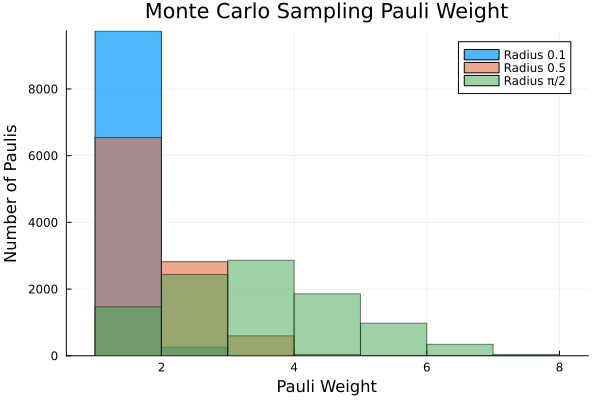

In [4]:
histogram(xlabel="Pauli Weight", ylabel="Number of Paulis", title="Monte Carlo Sampling Pauli Weight")
# TODO: define weight truncation for pstrings
thetas = ones(nparams) * 0.1
histogram!([countweight(montecarlopropagation(circ, op, thetas)[1].operator) for _ in 1:10000], bins=1:nq, alpha=0.7, label = "Radius 0.1")
thetas = ones(nparams) * 0.5
histogram!([countweight(montecarlopropagation(circ, op, thetas)[1].operator) for _ in 1:10000], bins=1:nq, alpha=0.6, label = "Radius 0.5")
thetas = ones(nparams) * π/2
histogram!([countweight(montecarlopropagation(circ, op, thetas)[1].operator) for _ in 1:10000], bins=1:nq, alpha=0.5, label = "Radius π/2")

### Testing Weight Truncation

In [5]:
Ws = 0:(nq-1)
@time errors = [estimateaverageerror(circ, op, 100000; max_weight=W) for W in Ws]
# where errors are zero, replace with small number to avoid log(0) error
errors[errors .== 0] .= 1e-10;

 10.213751 seconds (1.07 G allocations: 24.234 GiB, 30.43% gc time, 14.64% compilation time)


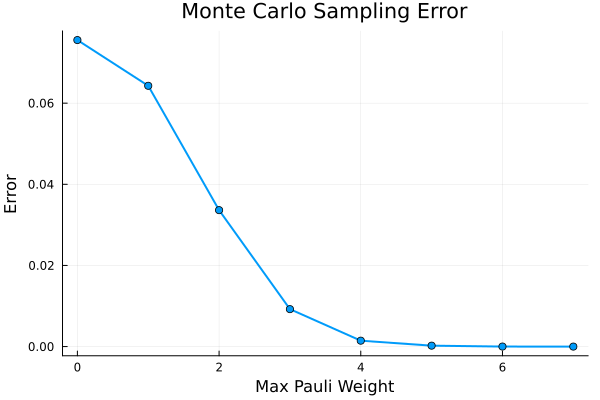

In [6]:
plot(Ws, errors, yscale=:identity, xlabel="Max Pauli Weight", ylabel="Error", title="Monte Carlo Sampling Error", label="", linewidth=2, marker=:circle)

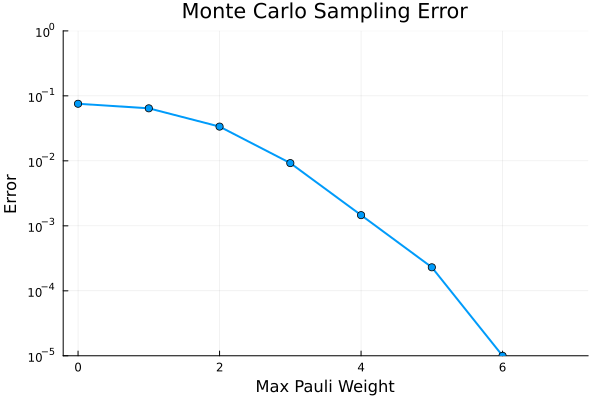

In [7]:
plot(Ws, errors, yscale=:log10, xlabel="Max Pauli Weight", ylabel="Error", title="Monte Carlo Sampling Error", ylim=(1e-5, 1e0), label="", linewidth=2, marker=:circle)

### Testing Frequency Truncation

In [8]:
wrapped_op = wrapcoefficients(op)

PauliString(nqubits: 8, PathProperty(NumericPathProperties) * IIIZIIII)

In [9]:
freqs = 0:5:50
@time errors = [estimateaverageerror(circ, wrapped_op, 100000; max_freq=freq) for freq in freqs]
# where errors are zero, replace with small number to avoid log(0) error
errors[errors .== 0] .= 1e-10;

 12.675146 seconds (1.25 G allocations: 29.987 GiB, 30.86% gc time, 14.09% compilation time)


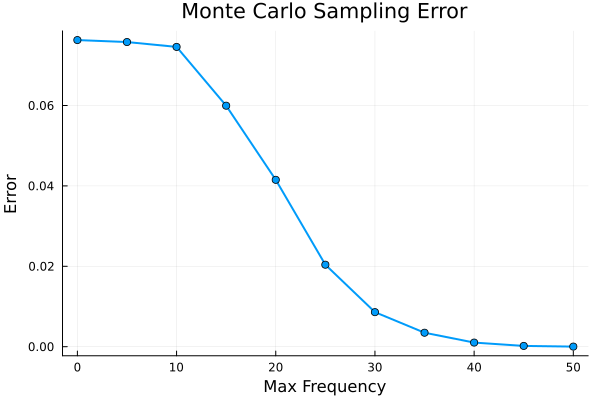

In [10]:
plot(freqs, errors, yscale=:identity, xlabel="Max Frequency", ylabel="Error", title="Monte Carlo Sampling Error", label="", linewidth=2, marker=:circle)

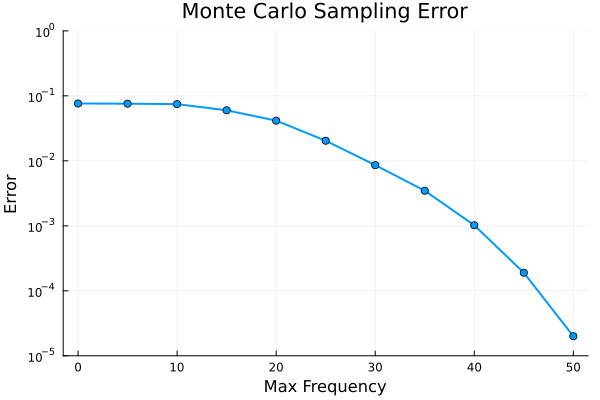

In [11]:
plot(freqs, errors, yscale=:log10, xlabel="Max Frequency", ylabel="Error", title="Monte Carlo Sampling Error", ylim=(1e-5, 1e0), label="", linewidth=2, marker=:circle)

### Test Small-Angle Truncation

In [12]:
nsins = 0:3:30
@time errors = [estimateaverageerror(circ, wrapped_op, 100000; max_sins=ns) for ns in nsins]
# where errors are zero, replace with small number to avoid log(0) error
errors[errors .== 0] .= 1e-10;

 12.987104 seconds (1.29 G allocations: 30.566 GiB, 30.82% gc time, 8.32% compilation time)


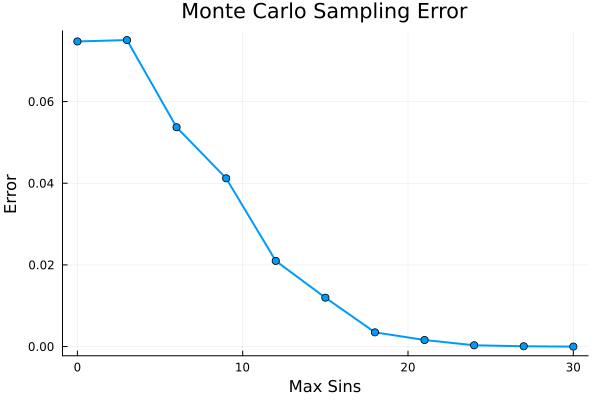

In [15]:
plot(nsins, errors, yscale=:identity, xlabel="Max Sins", ylabel="Error", title="Monte Carlo Sampling Error", label="", linewidth=2, marker=:circle)

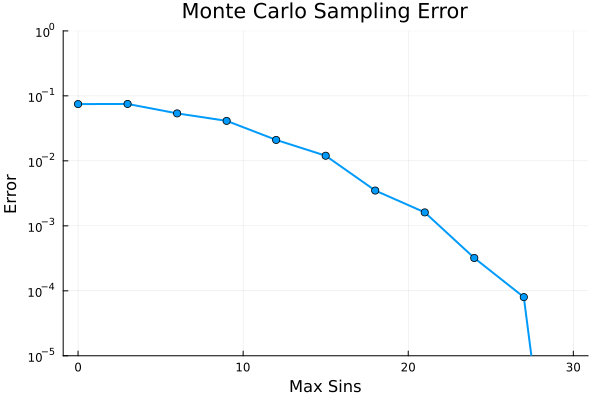

In [16]:
plot(nsins, errors, yscale=:log10, xlabel="Max Sins", ylabel="Error", title="Monte Carlo Sampling Error", ylim=(1e-5, 1e0), label="", linewidth=2, marker=:circle)